In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [2]:
# Initialize YuNet face detector
detector = cv.FaceDetectorYN.create(
    "/content/drive/MyDrive/ProgressSoft /face Bluring/model/face/face_detection_yunet_2023mar.onnx",  # Path to YuNet ONNX model
    "",
    (320, 320),                                     # Input size
    0.5,                                            # Score threshold
    0.3,                                            # NMS threshold
    5000                                            # Top K faces to detect
)

In [11]:
path = '/content/drive/MyDrive/ProgressSoft /face Bluring/images'
# Paths for input and output images
source_image_path = path + "/rotated.png"
result_image_path = path + "/result_gaussian_blur.jpg"

In [12]:
# Load the input image
img = cv.imread(source_image_path)
if img is None:
    print("Error: Unable to load image.")
    exit()

In [13]:
# Gets image dimensions
height, width, _ = img.shape

# Sets input size for the detector
detector.setInputSize((width, height))

# Detect faces
result = detector.detect(img)

# Check if faces are detected
if result[1] is not None:
    print(f"Detected {len(result[1])} face(s) in the image.")
    for idx, face in enumerate(result[1]):
        # Extract face coordinates (x, y, width, height)
        coords = face[:-1].astype(np.int32)
        x, y, w, h = coords[0], coords[1], coords[2], coords[3]

        # Ensuring coordinates are within image bounds and dimensions are positive
        x = max(0, x)
        y = max(0, y)
        w = min(width - x, w)  # Ensures width doesn't exceed image bounds
        h = min(height - y, h) # Ensures height doesn't exceed image bounds

        # Checking if the face region has valid dimensions before processing
        if w > 0 and h > 0:
            # Extracting the face region
            face_region = img[y:y+h, x:x+w]
            #Applying Pixelation bluring to the face region
            # Step 1: Resizing the face region to a very small size (e.g., 10x10)
            small_face = cv.resize(face_region, (10, 10), interpolation=cv.INTER_NEAREST)

            # Step 2: Resizing the small face region back to its original size
            pixelated_face = cv.resize(small_face, (w, h), interpolation=cv.INTER_NEAREST)

            # # Apply Gaussian blur to the face region
            # blurred_face = cv.GaussianBlur(face_region, (31, 31), 30)  # Kernel size and sigma

            # Replace the face region with the pixelated version
            img[y:y+h, x:x+w] = pixelated_face
        else:
            print(f"Warning: Skipping face with invalid dimensions (x={x}, y={y}, w={w}, h={h})")

Detected 1 face(s) in the image.


In [ ]:
print(result)

(1, None)


Blurred image saved to /content/drive/MyDrive/ProgressSoft /face Bluring/images/result_gaussian_blur.jpg


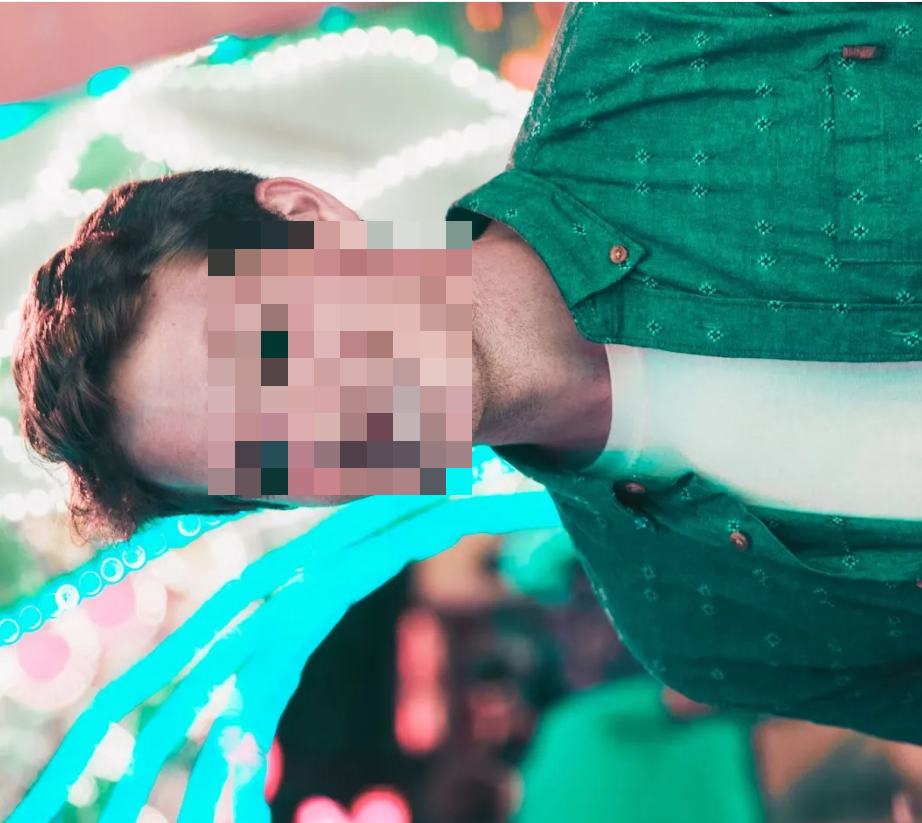

In [14]:
# Save the output image
cv.imwrite(result_image_path, img)
print(f"Blurred image saved to {result_image_path}")

# Display the result (optional)
cv2_imshow(img)
cv.waitKey(0)
cv.destroyAllWindows()